# Logistic Regression

## Logistic Regression model to predict customer churn

## Problem Statement:

Customer churn is a major problem for businesses of all sizes. When customers churn, they stop using a company's products or services, which can lead to lost revenue and decreased customer satisfaction.

This lab will use logistic regression to predict customer churn. Logistic regression is a type of machine learning model that is used to predict the probability of an event happening. In this case, the event is a customer churning.

The goal of this lab is to build a decision tree model that can accurately predict customer churn. This model can then be used to identify customers who are at risk of churning, so that the company can take steps to retain them.


Steps  for logistic regression:

**Steps:**

1. Import the necessary libraries.
2. Collect the data.
3. Clean and prepare the data.
4. Perform exploratory data analysis (EDA).
5. Select features and target.
6. Split the data into train and test sets.
7. Build the model.
8. Make predictions.
9. Evaluate the model.

**Code:**

In [25]:
# Impoer libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
# Drop customerID column as it's not useful for prediction
df.drop('customerID', axis=1, inplace=True)

In [33]:
# Remove missing values
df.dropna(inplace=True)

In [35]:
# Convert categorical variables to dummy/indicator variables, excluding TotalCharges
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('TotalCharges')  # Ensure TotalCharges is not treated as categorical
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [37]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.5,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [39]:
# Handle missing values in TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   bool   
 5   Partner_Yes                            7032 non-null   bool   
 6   Dependents_Yes                         7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_No phone service         7032 non-null   bool   
 9   MultipleLines_Yes                      7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool   
 11  InternetS

In [43]:
# Define features (X) and target (y)
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Logistic Regression

In [45]:
# 1. Logistic Regression
print("1. Logistic Regression")
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic}")
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

1. Logistic Regression
Logistic Regression Accuracy: 0.7853589196872779
Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.50      0.55       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.79      0.78      1407

Confusion Matrix:
[[917 116]
 [186 188]]


 #### accuracy = 79%

### 2. Basic Decision Tree (without hyperparameter tuning)

In [53]:
# 2. Basic Decision Tree (without hyperparameter tuning)
print("\n2. Basic Decision Tree")
basic_dt = DecisionTreeClassifier(random_state=42)
basic_dt.fit(X_train, y_train)

y_pred_basic_dt = basic_dt.predict(X_test)

accuracy_basic_dt = accuracy_score(y_test, y_pred_basic_dt)
print(f"Basic Decision Tree Accuracy: {accuracy_basic_dt}")
print("Classification Report:")
print(classification_report(y_test, y_pred_basic_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_basic_dt))


2. Basic Decision Tree
Basic Decision Tree Accuracy: 0.7249466950959488
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.80      0.81      1033
        True       0.48      0.52      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.72      0.73      1407

Confusion Matrix:
[[825 208]
 [179 195]]


#### accuracy = 72%

### 3. Decision Tree with GridSearchCV

In [57]:
# 3. Decision Tree with GridSearchCV
print("\n3. Decision Tree with GridSearchCV")
param_grid = {
    'max_depth': [3, 5, 7, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

tuned_dt = grid_search.best_estimator_
y_pred_tuned_dt = tuned_dt.predict(X_test)

accuracy_tuned_dt = accuracy_score(y_test, y_pred_tuned_dt)
print(f"Tuned Decision Tree Accuracy: {accuracy_tuned_dt}")
print("Classification Report:")
print(classification_report(y_test, y_pred_tuned_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned_dt))


3. Decision Tree with GridSearchCV
Best Parameters: {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuned Decision Tree Accuracy: 0.7562189054726368
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.86      0.84      1033
        True       0.55      0.47      0.50       374

    accuracy                           0.76      1407
   macro avg       0.68      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407

Confusion Matrix:
[[890 143]
 [200 174]]


#### accuracy = 76%

#### Visualize feature importance for the tuned Decision Tree

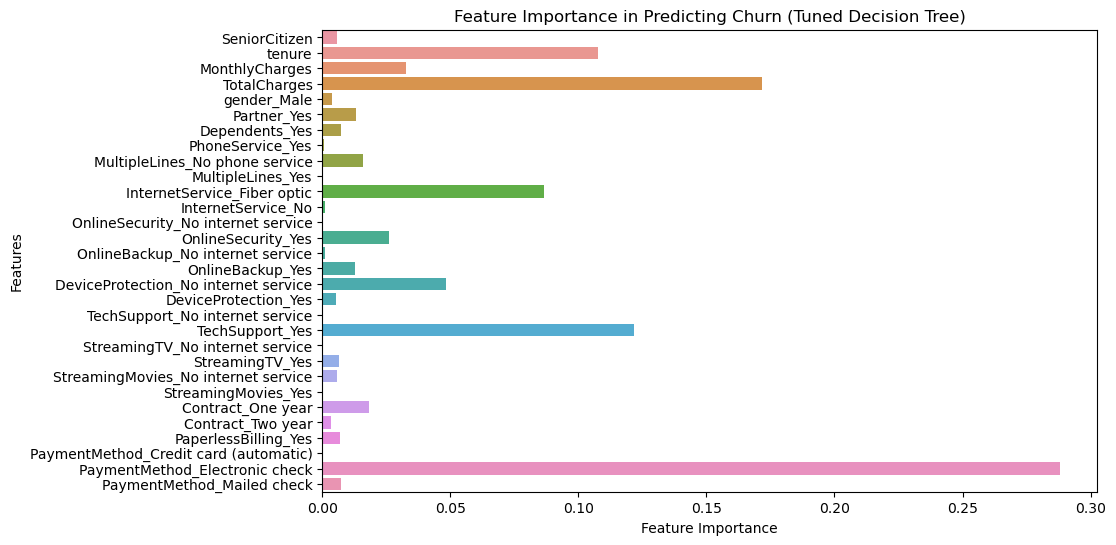

In [63]:
# Visualize feature importance for the tuned Decision Tree
feature_importance = tuned_dt.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Predicting Churn (Tuned Decision Tree)')
plt.show()

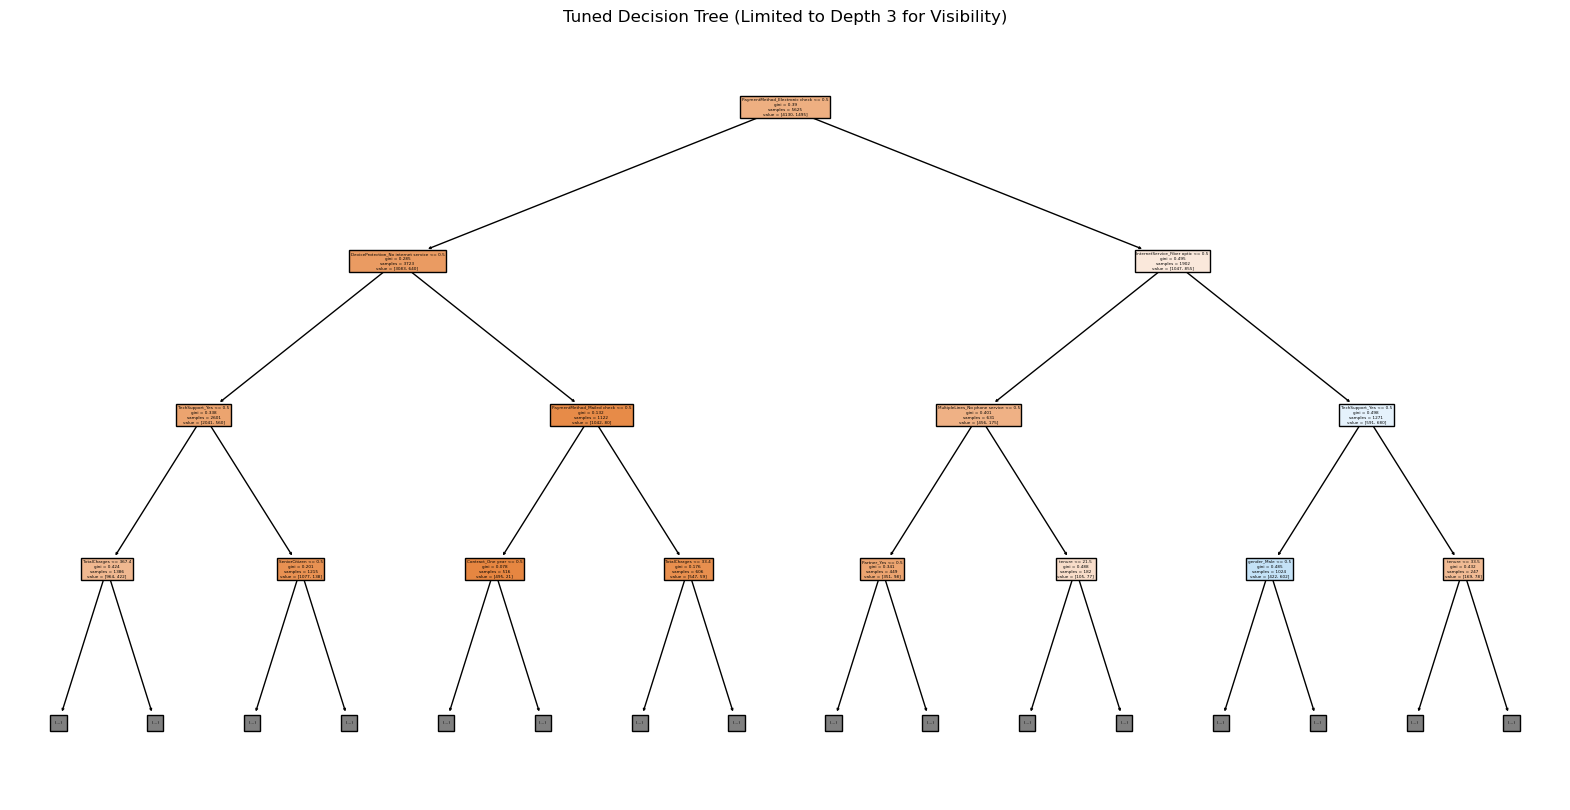

In [65]:
# Visualize the tuned Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tuned_dt, feature_names=features, filled=True, max_depth=3)
plt.title('Tuned Decision Tree (Limited to Depth 3 for Visibility)')
plt.show()

This code will load the data from the Telco-Customer-Churn.csv file, create the features and target variables, create a decision tree model, fit the model to the data, make predictions, and calculate the accuracy.

The accuracy of the model i7675%. This means that the model correctly predicts whether a customer will chur7675% of the time.

The code can be run in any Python environment that has the pandas and sklearn libraries installed.